In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
bcancer = pd.read_csv("data.csv")
bcancer.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


In [4]:
bcancer.shape

(569, 33)

In [5]:
bcancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
bcancer.drop('Unnamed: 32', axis = 1, inplace = True)

In [7]:
bcancer.drop('id',axis = 1, inplace=True)

In [8]:
bcancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
bcancer.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [10]:
bcancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
bcancer.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [12]:
bcancer['diagnosis'] = (bcancer['diagnosis'] == 'M').astype('int')

In [13]:
bcancer['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

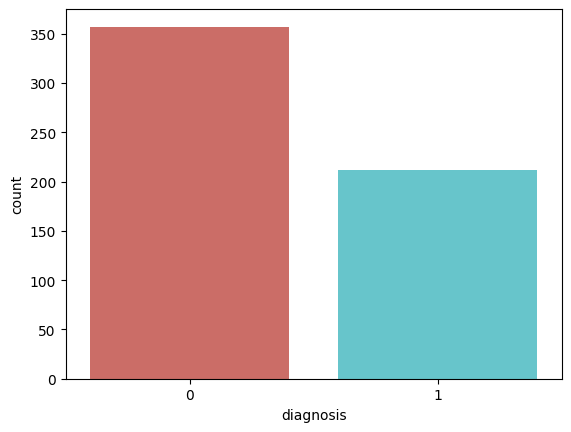

In [14]:
sns.countplot(x='diagnosis',data = bcancer,palette='hls')
plt.show()

<Axes: xlabel='diagnosis', ylabel='Count'>

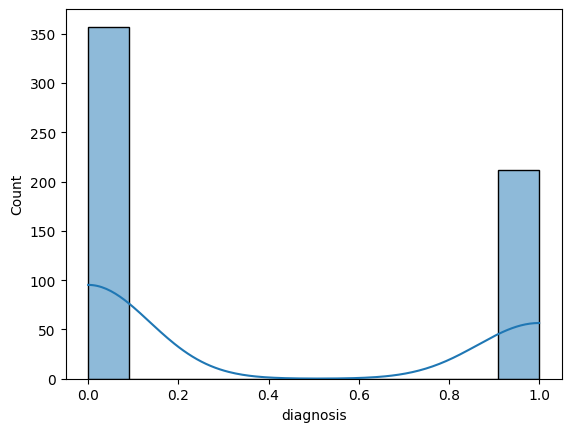

In [22]:
sns.histplot(bcancer['diagnosis'], kde=True)

<Axes: xlabel='radius_mean', ylabel='Count'>

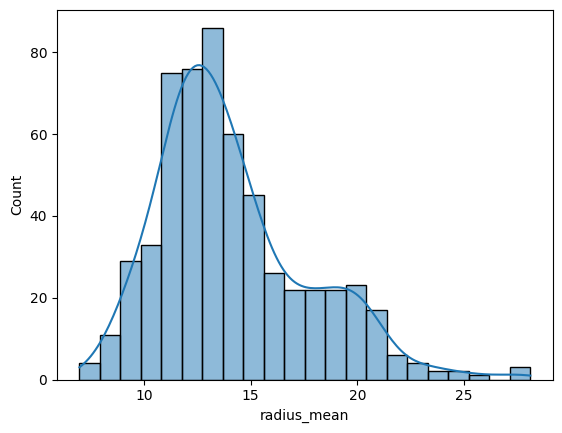

In [21]:
sns.histplot(bcancer['radius_mean'], kde=True)


<Axes: xlabel='perimeter_mean', ylabel='Count'>

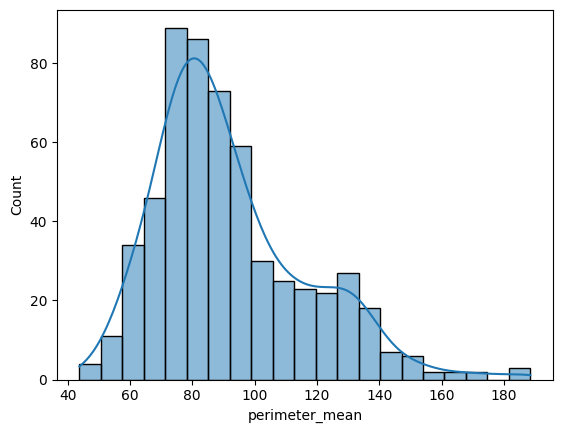

In [23]:
sns.histplot(bcancer['perimeter_mean'], kde=True)


In [24]:
features_mean=list(bcancer.columns[1:11])


bcancer_M = bcancer[bcancer['diagnosis'] == 1]
bcancer_B = bcancer[bcancer['diagnosis'] == 0]

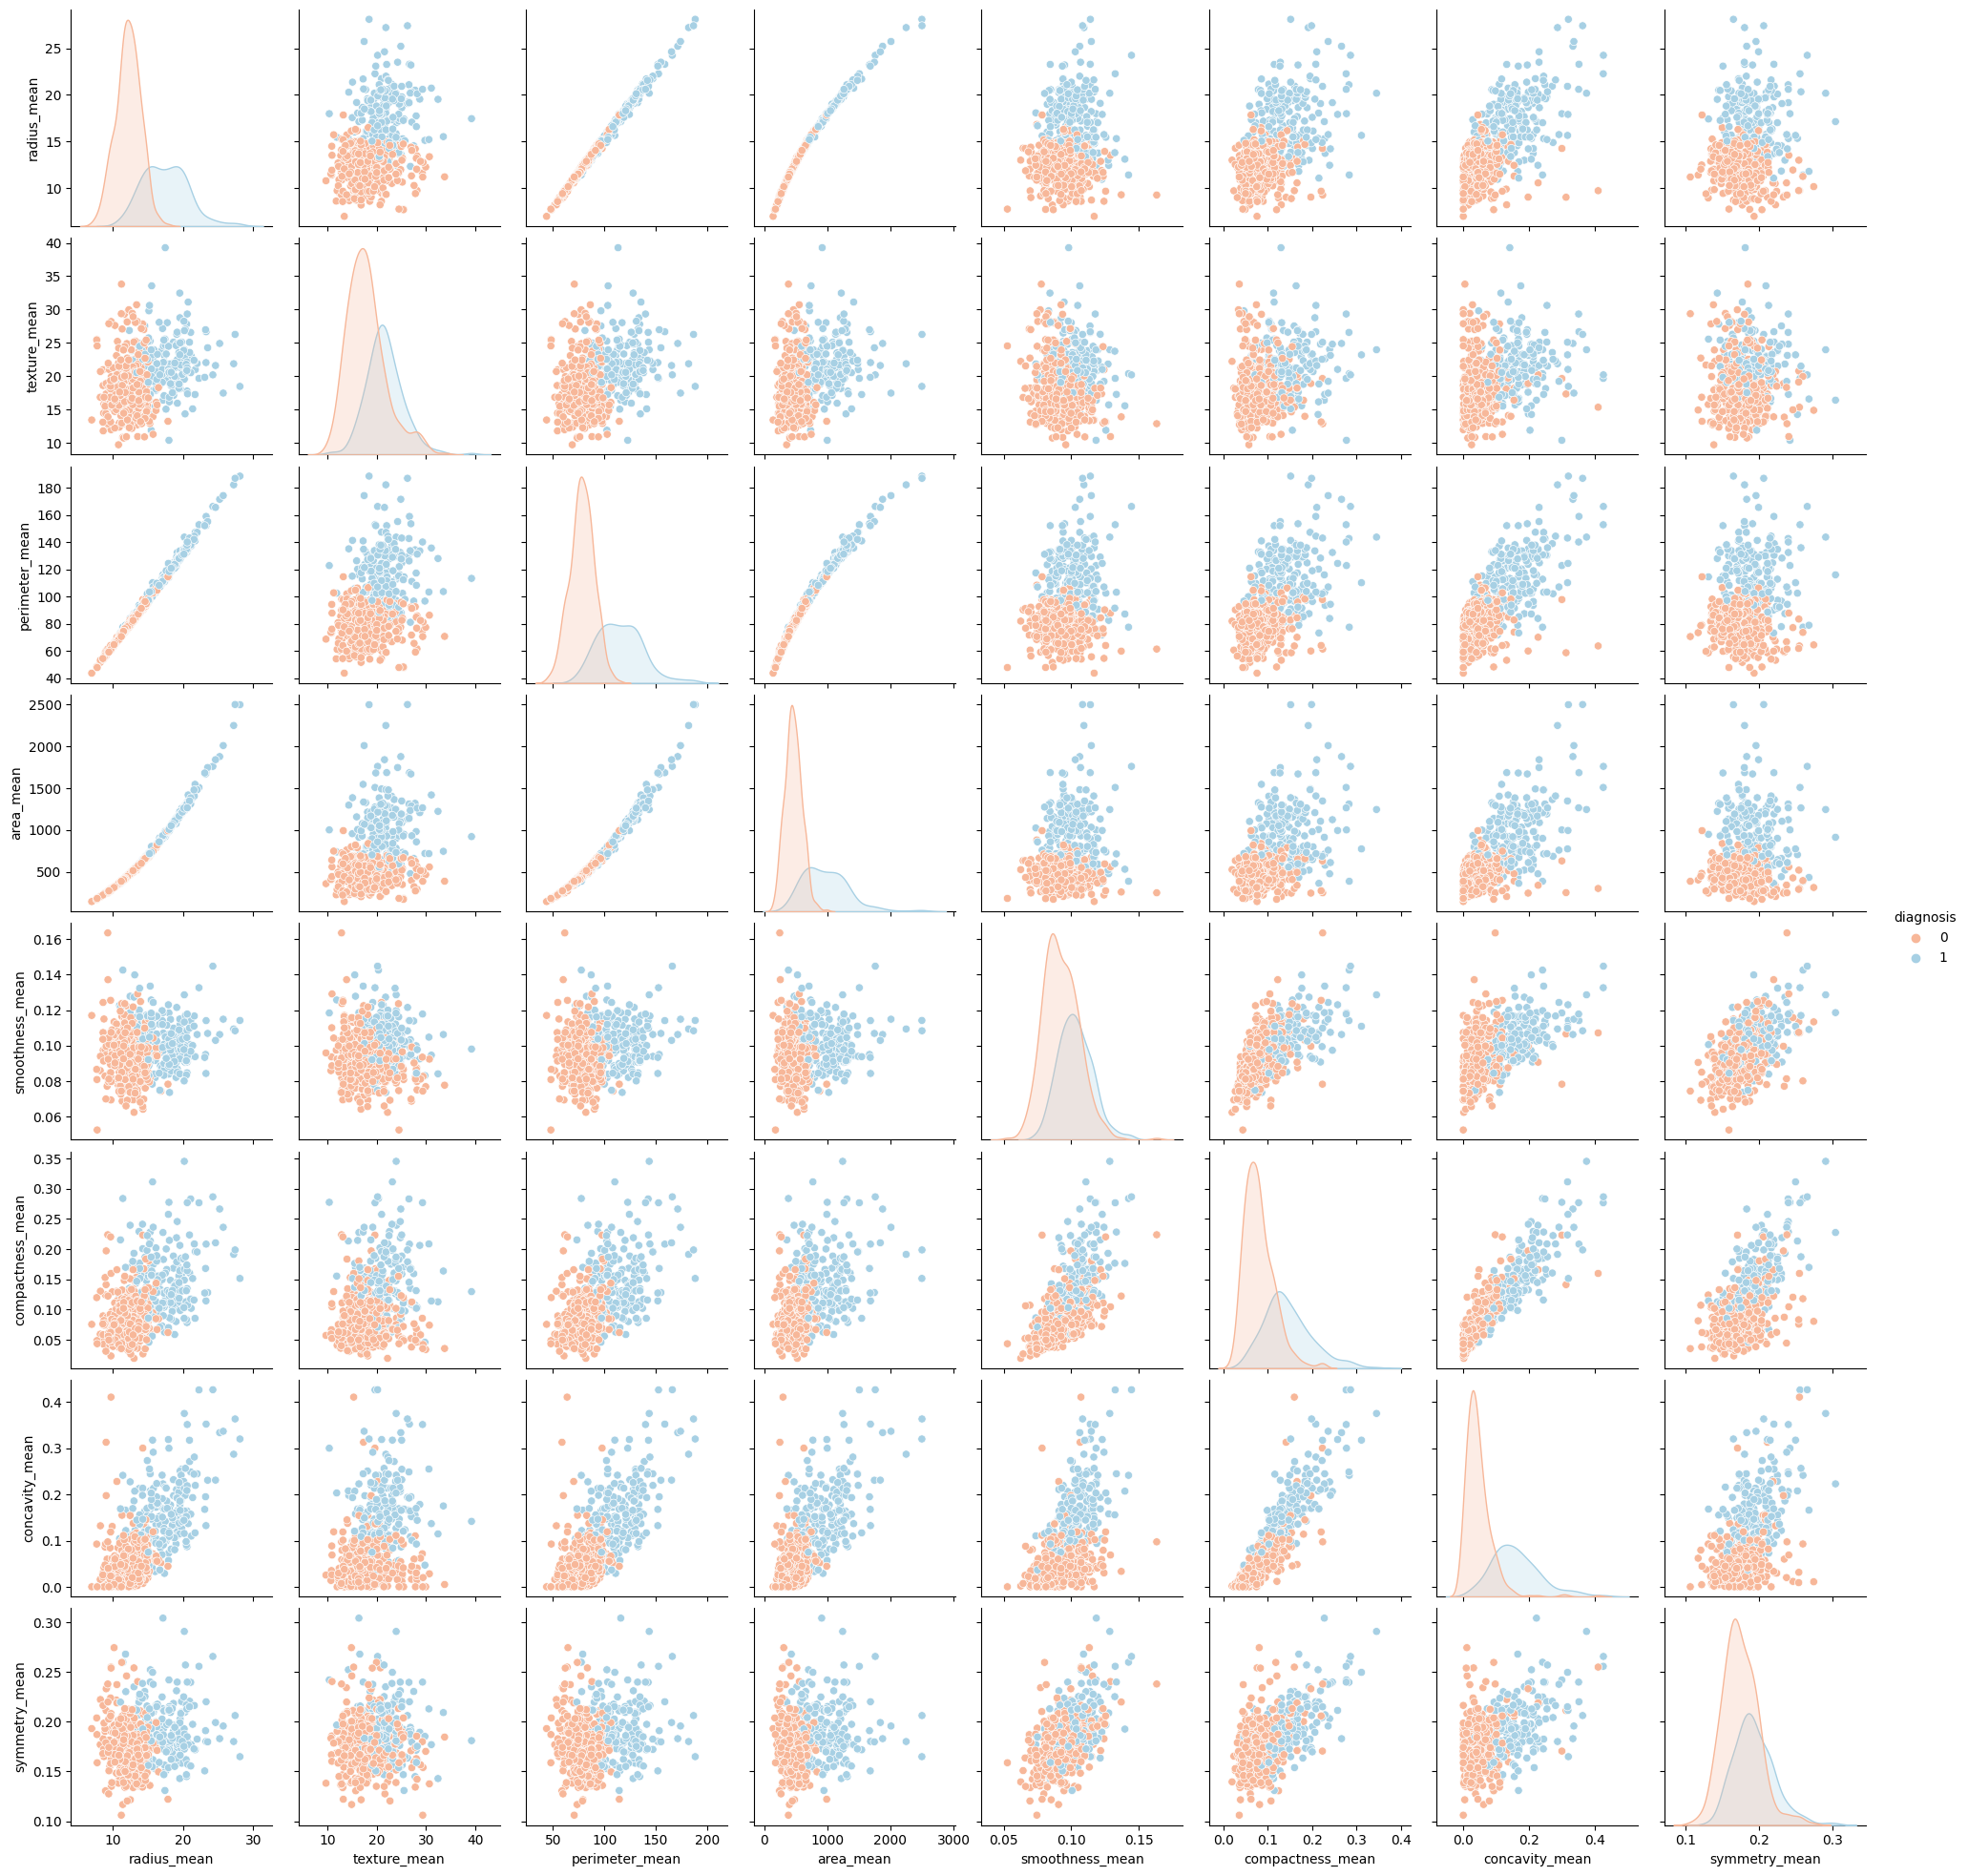

In [25]:
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean', 
        'symmetry_mean']

sns.pairplot(data = bcancer[cols], hue = 'diagnosis', palette = 'RdBu')

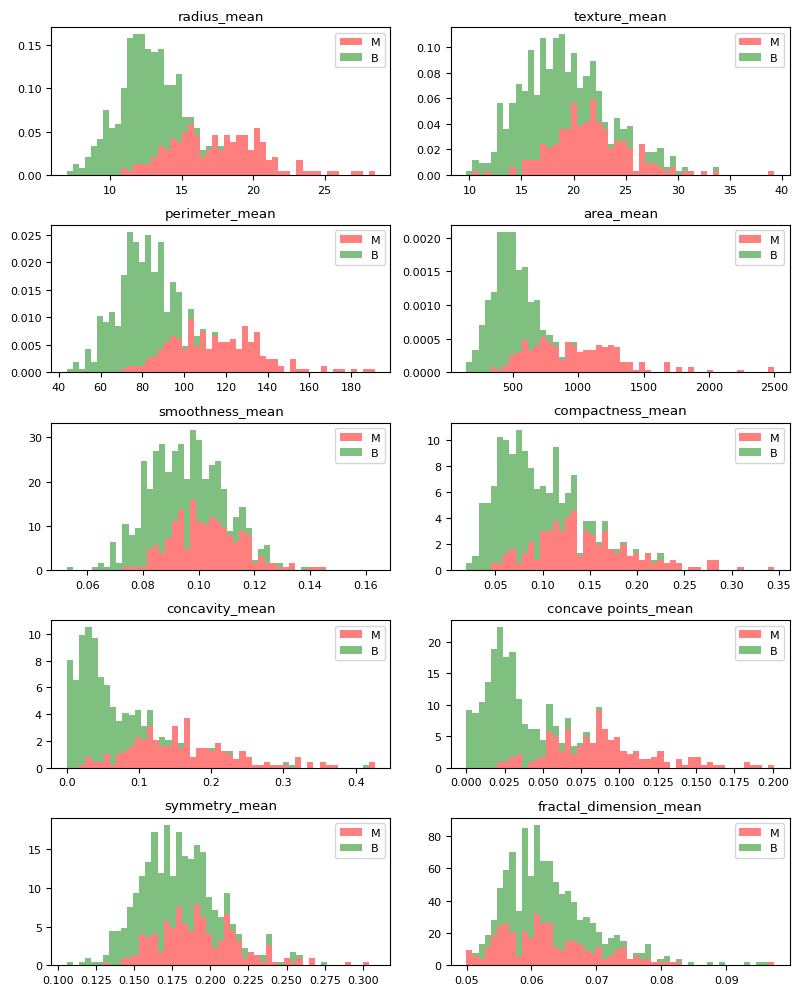

In [30]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    binwidth = (max(bcancer[features_mean[idx]]) - min(bcancer[features_mean[idx]])) / 50
    ax.hist([bcancer_M[features_mean[idx]], bcancer_B[features_mean[idx]]], bins=np.arange(min(bcancer[features_mean[idx]]),
            max(bcancer[features_mean[idx]]) + binwidth, binwidth), alpha=0.5, stacked=True,
            density=True, label=['M', 'B'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])

plt.tight_layout()
plt.show()


In [31]:
# Building the model with all the attributes 

x=bcancer.iloc[:,1:31]
y=bcancer['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [33]:
pd.options.display.max_columns = None
x_train.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.061580,0.071170,0.016640,0.02324,0.006185,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,0.2191,0.6946,1.479,17.74,0.004348,0.008153,0.004272,0.006829,0.02154,0.001802,14.67,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,0.3129,0.8413,2.075,29.44,0.009882,0.024440,0.045310,0.017630,0.02471,0.002142,16.43,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828


In [45]:
#Creating an instance of logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model1 = LogisticRegression()

#We fit our model to data
fitted_model1 = logistic_model1.fit(x_train,y_train)

#We use predict_proba() to predict the probabilities
predictedvalues1 = fitted_model1.predict(x_test)

#We print the probabilites to take a glance
print(predictedvalues1)



[1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]


C:\Users\CHINMAY\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
#Accuracy of the mode:-

print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logistic_model1.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.930


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test,predictedvalues1)
print(confusion_matrix1)

[[70  5]
 [ 3 36]]


In [49]:
#Generating the classification report.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedvalues1))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        75
           1       0.88      0.92      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



<Axes: >

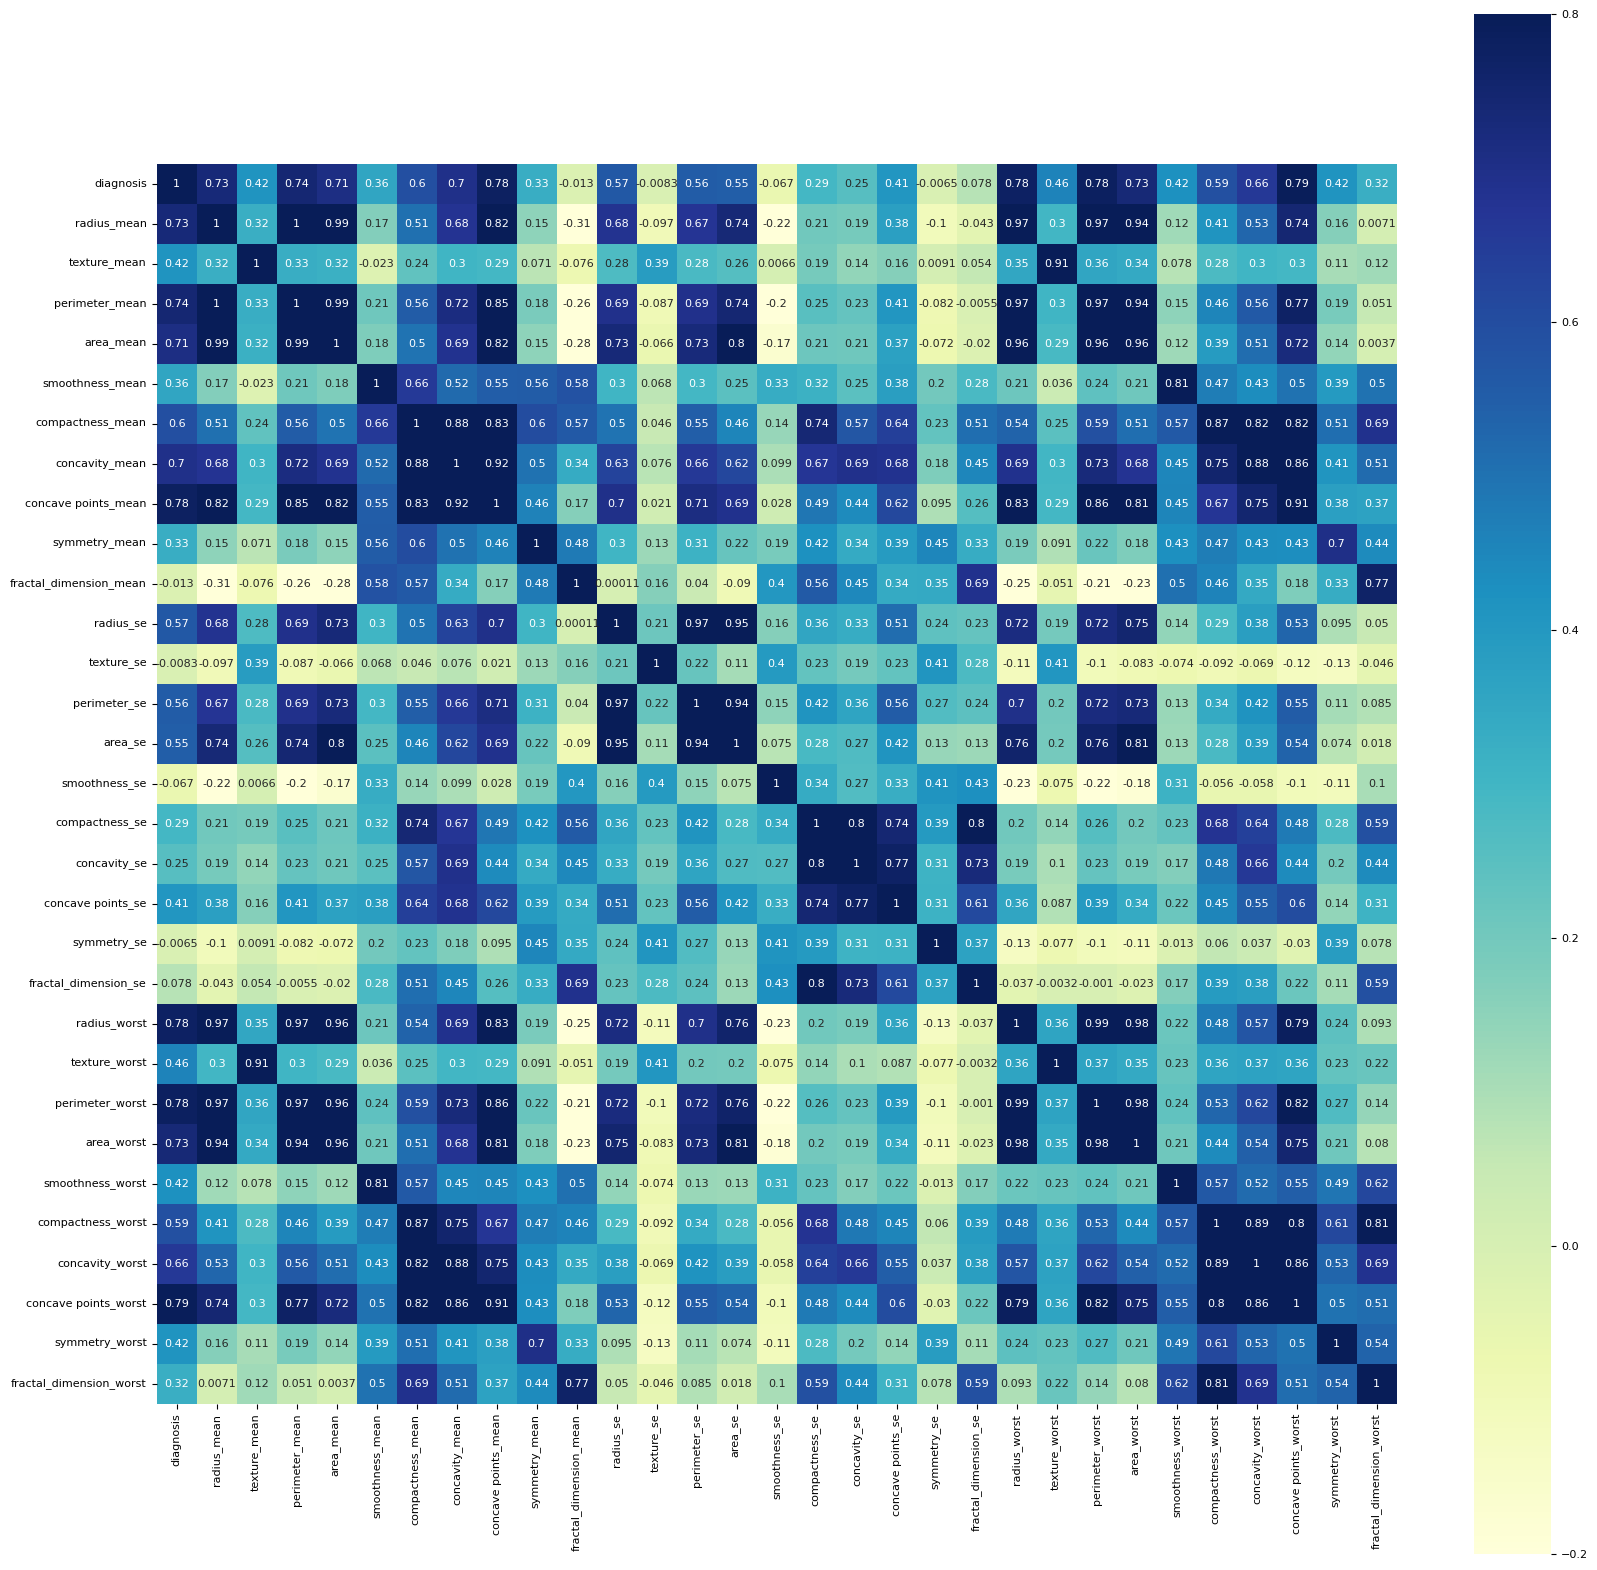

In [51]:
#Generating the correlation matrix.
fig, ax=plt.subplots(figsize=(20,20))
correlation=bcancer.corr()
sns.heatmap(correlation,square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu", annot=True)
